# 1. Autoencoder

In [1]:
import numpy as np
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as tfk
tfkl = tfk.layers

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
x_train = (x_train/255).astype('float32')
x_test = (x_test/255).astype('float32')

In [ ]:
autoencoder = tfk.Sequential()
autoencoder.add(tfkl.Conv2D(filters = 32, kernel_size=3, strides=1, 
                      padding="same", activation='relu', input_shape=(32,32,3)))
autoencoder.add(tfkl.BatchNormalization())
autoencoder.add(tfkl.Conv2D(filters = 32, kernel_size=3, strides=2, 
                      padding="same", activation='relu'))
autoencoder.add(tfkl.Conv2D(filters = 32, kernel_size=3, strides=1, 
                      padding="same", activation='relu'))
autoencoder.add(tfkl.BatchNormalization())
autoencoder.add(tfkl.UpSampling2D())
autoencoder.add(tfkl.Conv2D(filters = 32, kernel_size=3, strides=1, 
                      padding="same", activation='relu'))
autoencoder.add(tfkl.BatchNormalization())
autoencoder.add(tfkl.Conv2D(3,kernel_size=1, strides=1, padding='same', activation='sigmoid'))
autoencoder.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_75 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_42 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_43 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
up_sampling2d_20 (UpSampling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 32, 32, 32)      

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
results1 = autoencoder.fit(x_train,x_train,epochs=20,steps_per_epoch=10,batch_size=1000)

Epoch 1/20
10/10 [==============================] - 40s 4s/step - loss: 0.6584 - accuracy: 0.4033
Epoch 2/20
10/10 [==============================] - 40s 4s/step - loss: 0.5832 - accuracy: 0.5045
Epoch 3/20
10/10 [==============================] - 40s 4s/step - loss: 0.5701 - accuracy: 0.5518
Epoch 4/20
10/10 [==============================] - 40s 4s/step - loss: 0.5651 - accuracy: 0.5955
Epoch 5/20
10/10 [==============================] - 40s 4s/step - loss: 0.5622 - accuracy: 0.6351
Epoch 6/20
10/10 [==============================] - 40s 4s/step - loss: 0.5597 - accuracy: 0.6648
Epoch 7/20
10/10 [==============================] - 40s 4s/step - loss: 0.5586 - accuracy: 0.6866
Epoch 8/20
10/10 [==============================] - 40s 4s/step - loss: 0.5579 - accuracy: 0.7038
Epoch 9/20
10/10 [==============================] - 40s 4s/step - loss: 0.5558 - accuracy: 0.7169
Epoch 10/20
10/10 [==============================] - 40s 4s/step - loss: 0.5552 - accuracy: 0.7224
Epoch 11/20
10/10 [

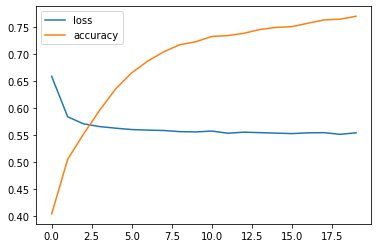

In [ ]:
plt.plot(results1.history['loss'])
plt.plot(results1.history['accuracy'])
plt.legend(labels=['loss','accuracy'])

In [ ]:
new_img = autoencoder.predict(x_test)

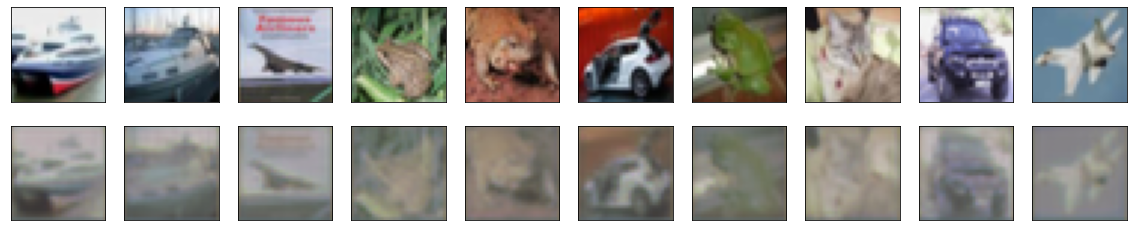

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # plot orginal image
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot predict image
    ax = plt.subplot(2, n, i + n)
    plt.imshow(new_img[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 2.1 Deep CNN


In [4]:
tf.one_hot(y_train,depth=10)

<tf.Tensor: shape=(50000, 1, 10), dtype=float32, numpy=
array([[[0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 1.]],

       [[0., 0., 0., ..., 0., 0., 1.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 1.]],

       [[0., 1., 0., ..., 0., 0., 0.]],

       [[0., 1., 0., ..., 0., 0., 0.]]], dtype=float32)>

In [ ]:
model1 = tfk.Sequential()
model1.add(tfkl.Conv2D(64,kernel_size=(3,3),strides=1,input_shape=(32,32,3),padding='valid',activation='relu'))
model1.add(tfkl.MaxPool2D(pool_size=(2,2)))
model1.add(tfkl.Dropout(0.3))
model1.add(tfkl.Conv2D(32,kernel_size=(3,3),strides=1,padding='valid',activation='relu'))
model1.add(tfkl.MaxPool2D(pool_size=(2,2)))
model1.add(tfkl.Dropout(0.3))
model1.add(tfkl.Flatten())
model1.add(tfkl.Dense(64,activation='relu'))
model1.add(tfkl.Dropout(0.5))
model1.add(tfkl.Dense(10,activation='softmax'))
model1.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_53 (Dropout)         (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 13, 13, 32)        18464     
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_54 (Dropout)         (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1152)            

In [ ]:
# In this model, I choose the kernel size is (3,3) and the strides=1,padding is valid, and the depth is 7.

In [ ]:
model1.compile(optimizer=tfk.optimizers.RMSprop(),loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
from keras.utils import to_categorical

In [13]:
train_label = to_categorical(y_train)

In [15]:
test_label = to_categorical(y_test)

In [ ]:
results2 = model1.fit(x_train,train_label,steps_per_epoch=100,epochs=20,batch_size=16,validation_data=(x_test,test_label))

Epoch 1/20
100/100 [==============================] - 8s 80ms/step - loss: 2.2861 - accuracy: 0.1244 - val_loss: 2.2824 - val_accuracy: 0.1139
Epoch 2/20
100/100 [==============================] - 8s 79ms/step - loss: 2.1949 - accuracy: 0.1850 - val_loss: 2.1137 - val_accuracy: 0.2279
Epoch 3/20
100/100 [==============================] - 8s 79ms/step - loss: 2.0646 - accuracy: 0.2262 - val_loss: 1.9521 - val_accuracy: 0.3045
Epoch 4/20
100/100 [==============================] - 8s 80ms/step - loss: 2.0183 - accuracy: 0.2469 - val_loss: 1.9163 - val_accuracy: 0.3205
Epoch 5/20
100/100 [==============================] - 7s 74ms/step - loss: 1.9446 - accuracy: 0.2781 - val_loss: 1.8537 - val_accuracy: 0.3454
Epoch 6/20
100/100 [==============================] - 7s 74ms/step - loss: 1.8719 - accuracy: 0.2937 - val_loss: 1.7521 - val_accuracy: 0.3657
Epoch 7/20
100/100 [==============================] - 8s 83ms/step - loss: 1.8818 - accuracy: 0.3150 - val_loss: 1.6907 - val_accuracy: 0.4069

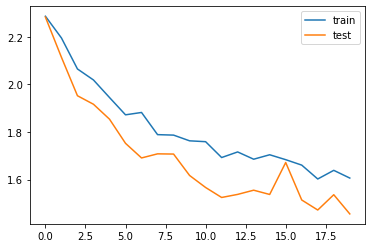

In [ ]:
plt.plot(results2.history['loss'])
plt.plot(results2.history['val_loss'])
plt.legend(labels=['train','test'])

# 2.2 Transfer learning

In [5]:
from tensorflow.keras.applications import VGG16

In [6]:
conv_base = VGG16(weights = 'imagenet', include_top = False, input_shape = (32,32,3))
conv_base.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
______________________________________________________________

In [7]:
model2 = tfk.Sequential()
model2.add(conv_base)
model2.add(tfkl.Flatten())
model2.add(tfkl.Dense(64, activation='relu'))
model2.add(tfkl.Dropout(0.5))
model2.add(tfkl.Dense(10, activation='softmax'))
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 14,748,170
Trainable params: 14,748,170
Non-trainable params: 0
_________________________________________________________________


In [8]:
conv_base.trainable = False
len(model2.trainable_weights)

4

In [9]:
model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
results3 = model2.fit(x_train, train_label, epochs=5, batch_size=32,validation_data=(x_test,test_label))

Epoch 1/5
1563/1563 [==============================] - 655s 419ms/step - loss: 1.6555 - accuracy: 0.4156 - val_loss: 1.3700 - val_accuracy: 0.5188
Epoch 2/5
1563/1563 [==============================] - 647s 414ms/step - loss: 1.4471 - accuracy: 0.4965 - val_loss: 1.2909 - val_accuracy: 0.5532
Epoch 3/5
1563/1563 [==============================] - 649s 415ms/step - loss: 1.4067 - accuracy: 0.5176 - val_loss: 1.2636 - val_accuracy: 0.5606
Epoch 4/5
1563/1563 [==============================] - 651s 417ms/step - loss: 1.3910 - accuracy: 0.5218 - val_loss: 1.2764 - val_accuracy: 0.5626
Epoch 5/5
1563/1563 [==============================] - 651s 416ms/step - loss: 1.3899 - accuracy: 0.5292 - val_loss: 1.2598 - val_accuracy: 0.5705


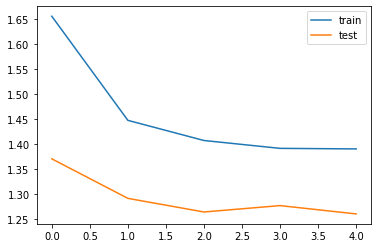

In [17]:
plt.plot(results3.history['loss'])
plt.plot(results3.history['val_loss'])
plt.legend(labels=['train','test'])

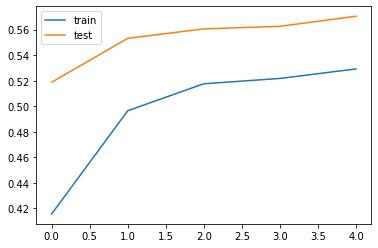

In [18]:
plt.plot(results3.history['accuracy'])
plt.plot(results3.history['val_accuracy'])
plt.legend(labels=['train','test'])

# 3. Text classification

# 3.1 RNN


In [19]:
import pandas as pd

In [20]:
spam = pd.read_csv('SPAM_detection.csv')

In [21]:
spam

,Message,category_val
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will ü b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [22]:
x = spam['Message']
y = spam['category_val']

In [23]:
x=np.asarray(x)
y=np.asarray(y)

In [24]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [25]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)

In [26]:
vocab_size = len(tokenizer.word_index)+1

In [27]:
sequences = tokenizer.texts_to_sequences(x)

In [28]:

data = pad_sequences(sequences,padding='post')

In [29]:
np.random.seed(2020)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)

In [30]:
data = data[indices]
labels = y[indices]

In [31]:
i = int(5572*0.8)

In [32]:
x_train = data[:i]
y_train = labels[:i]
x_test = data[i:]
y_test = labels[i:]

In [33]:
x_train.shape

(4457, 189)

In [34]:
model3 = tfk.Sequential()
model3.add(tfkl.Embedding(vocab_size, 16, input_length=189))
model3.add(tfkl.LSTM(128,return_sequences=True))
model3.add(tfkl.GlobalMaxPool1D())
model3.add(tfkl.Dropout(0.4))
model3.add(tfkl.Dense(64,activation="relu"))
model3.add(tfkl.Dropout(0.4))
model3.add(tfkl.Dense(1,activation="sigmoid"))
model3.compile(loss='binary_crossentropy', optimizer=tfk.optimizers.RMSprop(lr=0.01),metrics=['accuracy'])
model3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 189, 16)           144080    
_________________________________________________________________
lstm (LSTM)                  (None, 189, 128)          74240     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [35]:
results3 = model3.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,steps_per_epoch=20,batch_size=32)

Epoch 1/20
20/20 [==============================] - 6s 304ms/step - loss: 0.4121 - accuracy: 0.8813 - val_loss: 0.3448 - val_accuracy: 0.8592
Epoch 2/20
20/20 [==============================] - 6s 279ms/step - loss: 0.3030 - accuracy: 0.8859 - val_loss: 0.3076 - val_accuracy: 0.9283
Epoch 3/20
20/20 [==============================] - 6s 277ms/step - loss: 0.3383 - accuracy: 0.8891 - val_loss: 0.3112 - val_accuracy: 0.8592
Epoch 4/20
20/20 [==============================] - 6s 275ms/step - loss: 0.1880 - accuracy: 0.9422 - val_loss: 0.2249 - val_accuracy: 0.9202
Epoch 5/20
20/20 [==============================] - 5s 274ms/step - loss: 0.1812 - accuracy: 0.9406 - val_loss: 0.2517 - val_accuracy: 0.9390
Epoch 6/20
20/20 [==============================] - 5s 275ms/step - loss: 0.2467 - accuracy: 0.9125 - val_loss: 0.1157 - val_accuracy: 0.9596
Epoch 7/20
20/20 [==============================] - 5s 273ms/step - loss: 0.1291 - accuracy: 0.9676 - val_loss: 0.1494 - val_accuracy: 0.9543
Epoch 

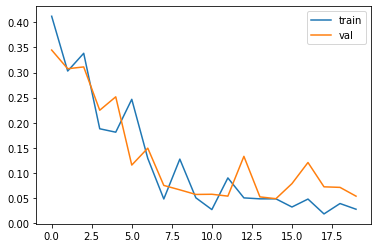

In [36]:
plt.plot(results3.history["loss"])
plt.plot(results3.history["val_loss"])
plt.legend(labels=["train", "val"])

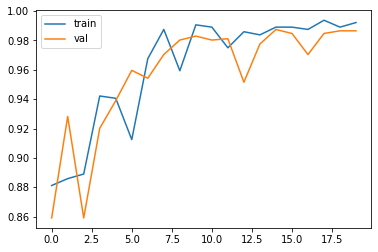

In [37]:
plt.plot(results3.history["accuracy"])
plt.plot(results3.history["val_accuracy"])
plt.legend(labels=["train", "val"])

# 3.2 CNN

In [39]:
model4 = tfk.Sequential()
model4.add(tfkl.Embedding(vocab_size, 16, input_length=189))
model4.add(tfkl.Conv1D(64, kernel_size = 3,padding='valid',activation='relu',strides=1))
model4.add(tfkl.GlobalMaxPool1D())
model4.add(tfkl.Dropout(0.4))
model4.add(tfkl.Dense(32,activation="relu"))
model4.add(tfkl.Dropout(0.4))
model4.add(tfkl.Dense(1,activation="sigmoid"))
model4.compile(loss='binary_crossentropy', optimizer=tfk.optimizers.RMSprop(lr=0.01),metrics=['accuracy'])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 189, 16)           144080    
_________________________________________________________________
conv1d (Conv1D)              (None, 187, 64)           3136      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [40]:
results4 = model4.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,steps_per_epoch=20,batch_size=32)

Epoch 1/20
20/20 [==============================] - 0s 21ms/step - loss: 0.3647 - accuracy: 0.8703 - val_loss: 0.3393 - val_accuracy: 0.8592
Epoch 2/20
20/20 [==============================] - 0s 16ms/step - loss: 0.2414 - accuracy: 0.8906 - val_loss: 0.1072 - val_accuracy: 0.9749
Epoch 3/20
20/20 [==============================] - 0s 14ms/step - loss: 0.1294 - accuracy: 0.9625 - val_loss: 0.0865 - val_accuracy: 0.9767
Epoch 4/20
20/20 [==============================] - 0s 15ms/step - loss: 0.0762 - accuracy: 0.9797 - val_loss: 0.1413 - val_accuracy: 0.9650
Epoch 5/20
20/20 [==============================] - 0s 14ms/step - loss: 0.1061 - accuracy: 0.9781 - val_loss: 0.0806 - val_accuracy: 0.9803
Epoch 6/20
20/20 [==============================] - 0s 14ms/step - loss: 0.0708 - accuracy: 0.9812 - val_loss: 0.0657 - val_accuracy: 0.9848
Epoch 7/20
20/20 [==============================] - 0s 15ms/step - loss: 0.1116 - accuracy: 0.9789 - val_loss: 0.0756 - val_accuracy: 0.9785
Epoch 8/20
20

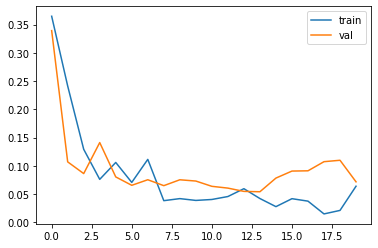

In [41]:
plt.plot(results4.history["loss"])
plt.plot(results4.history["val_loss"])
plt.legend(labels=["train", "val"])

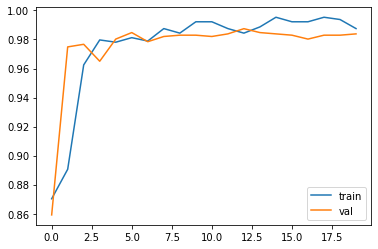

In [42]:
plt.plot(results4.history["accuracy"])
plt.plot(results4.history["val_accuracy"])
plt.legend(labels=["train", "val"])

# 3.3 ROC

In [43]:
from sklearn.metrics import roc_curve,auc

In [45]:
pred_rnn = model3.predict(x_test)

In [49]:
FP_rate =dict()
TP_rate = dict()
ROC1 = dict()
for i in range(2):
  FP_rate[i],TP_rate[i],_ = roc_curve(y_test,pred_rnn)
  ROC1[i] = auc(FP_rate[i],TP_rate[i])

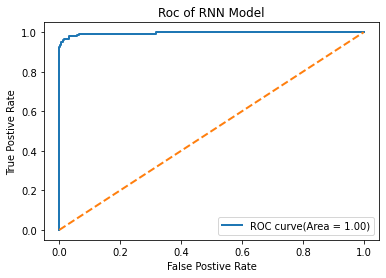

In [58]:
plt.figure()
plt.plot(FP_rate[0],TP_rate[0],lw=2,label='ROC curve(Area = %0.2f)'%ROC1[0])
plt.plot([0,1],[0,1],lw=2,linestyle='--')
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('Roc of RNN Model')
plt.legend(loc='lower right')
plt.show()

In [60]:
pred_cnn = model4.predict(x_test)

In [61]:
FP_rate =dict()
TP_rate = dict()
ROC2 = dict()
for i in range(2):
  FP_rate[i],TP_rate[i],_ = roc_curve(y_test,pred_cnn)
  ROC2[i] = auc(FP_rate[i],TP_rate[i])

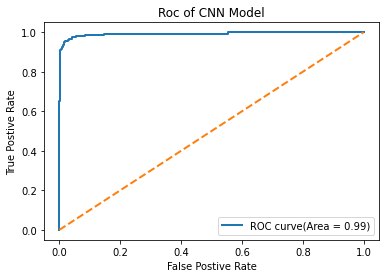

In [62]:
plt.figure()
plt.plot(FP_rate[0],TP_rate[0],lw=2,label='ROC curve(Area = %0.2f)'%ROC2[0])
plt.plot([0,1],[0,1],lw=2,linestyle='--')
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('Roc of CNN Model')
plt.legend(loc='lower right')
plt.show()

#The test accuracy for the Model RNN is a little higher